# **Integrantes del Grupo**

* Jhonnatan Pinilla 
* Camilo Barbosa
* Juan Cortes 
* Dayler Oviedo 


# **Instalando Librerias necesarias**

In [ ]:
pip install xgboost==1.1.0

In [ ]:
!pip install sweetviz

## *Inclusion de Librerias*


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sweetviz as sv
import seaborn as sns

# **Importar Dataset**


In [ ]:
#Importar datos
dataset = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTX3IyHVR8e33CECTVi_T8mjkFcVInGJGGX8Xm8h9T4O4StBE2cADxHVlRmqMMSTBpVIbixxr4eHObD/pub?output=csv")

# Entendimiento de los datos


##  *Visualizando los datos del Dataset*

In [ ]:
dataset.head()

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [ ]:
dataset.describe(include='all')

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
count,206068.000000,206068,206068.000000,206067,206068,206068,206068,206068,206068.000000,206068,206068.000000,206068.000000,2.060680e+05,202635.000000,206068,203211,206068
unique,NaN,32,NaN,1018,13,120,223,271,NaN,36,NaN,NaN,NaN,NaN,23,214,3
top,NaN,BOYACA,NaN,BOLIVAR,FRUTALES,MAIZ,MAIZ,MAIZ TRADICIONAL,NaN,2018,NaN,NaN,NaN,NaN,FRUTO FRESCO,ZEA MAYS,TRANSITORIO
freq,NaN,20576,NaN,1012,50236,24965,24965,20069,NaN,8901,NaN,NaN,NaN,NaN,59682,25199,108943
mean,40.322563,NaN,40747.534066,NaN,NaN,NaN,NaN,NaN,2012.455976,NaN,291.073825,249.419522,2.790726e+03,9.238820,NaN,NaN,NaN
std,25.278662,NaN,25256.621906,NaN,NaN,NaN,NaN,NaN,3.479113,NaN,1153.602556,980.375226,4.511471e+04,14.888659,NaN,NaN,NaN
min,5.000000,NaN,5001.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,NaN,0.000000,0.000000,0.000000e+00,0.030000,NaN,NaN,NaN
25%,17.000000,NaN,17524.000000,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,10.000000,8.000000,3.200000e+01,1.500000,NaN,NaN,NaN
50%,41.000000,NaN,41357.000000,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,35.000000,30.000000,1.400000e+02,5.000000,NaN,NaN,NaN
75%,68.000000,NaN,68001.000000,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,151.000000,130.000000,6.480000e+02,11.230000,NaN,NaN,NaN


In [ ]:
#Cantidad de filas y columnas del Dataset
dataset.shape

(206068, 17)

                                             |          | [  0%]   00:00 -> (? left)


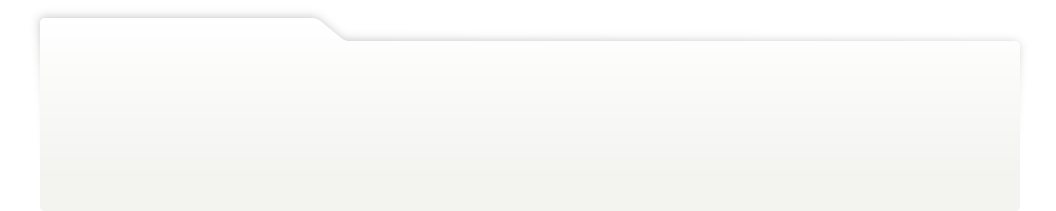
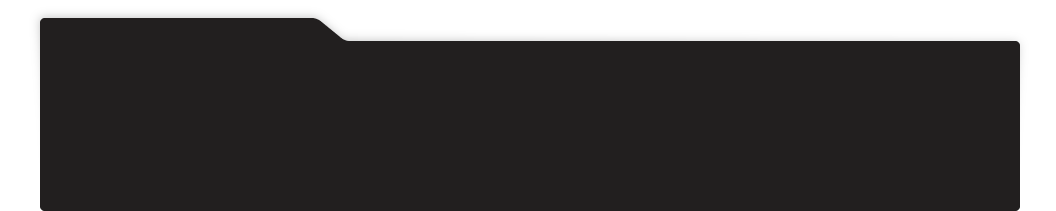
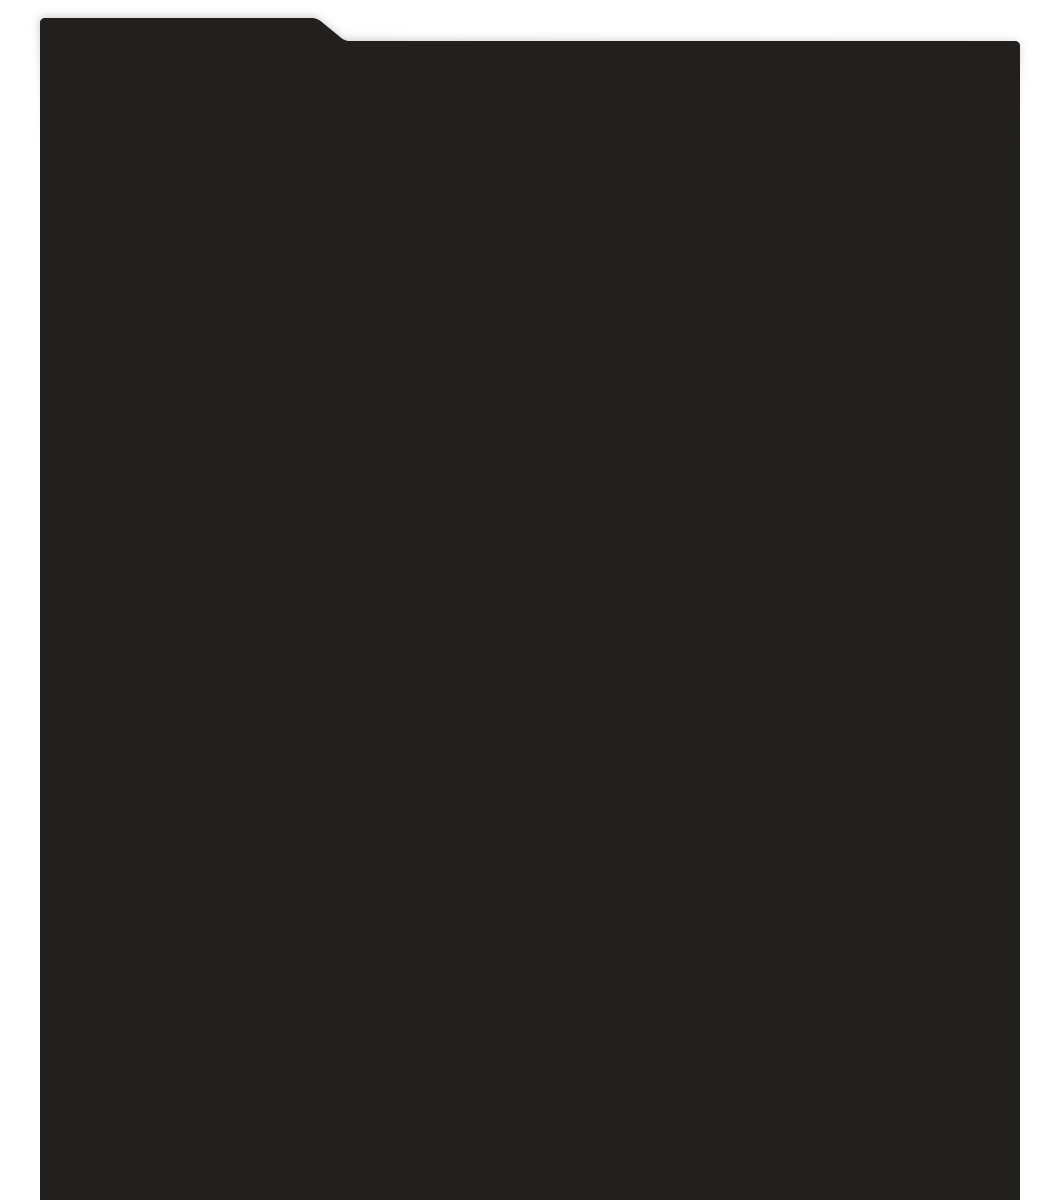
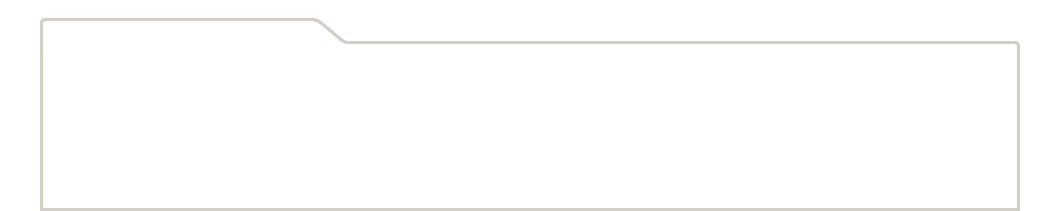
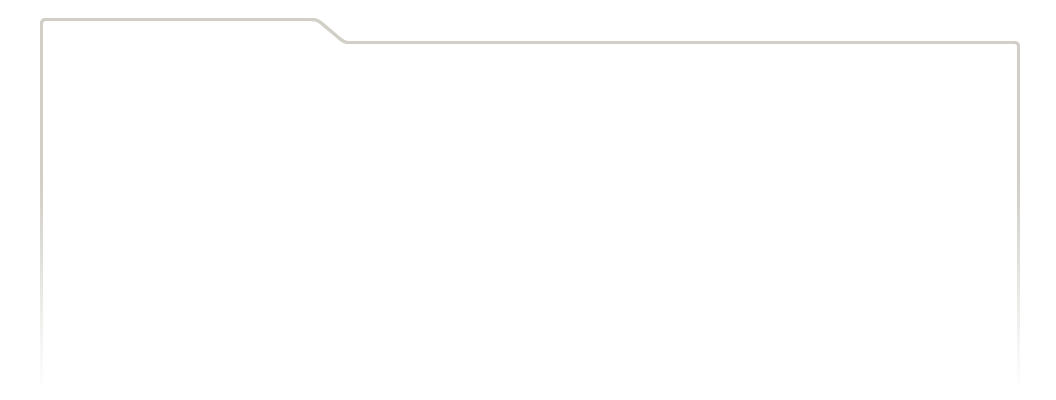
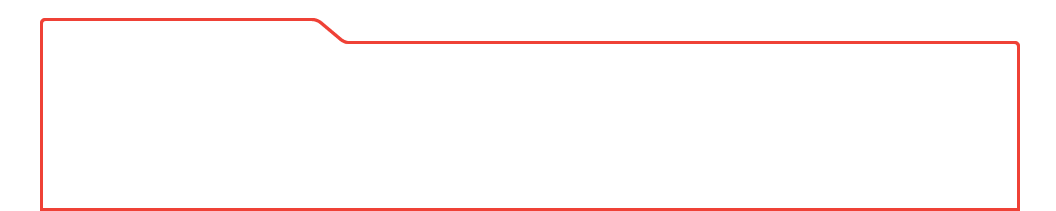
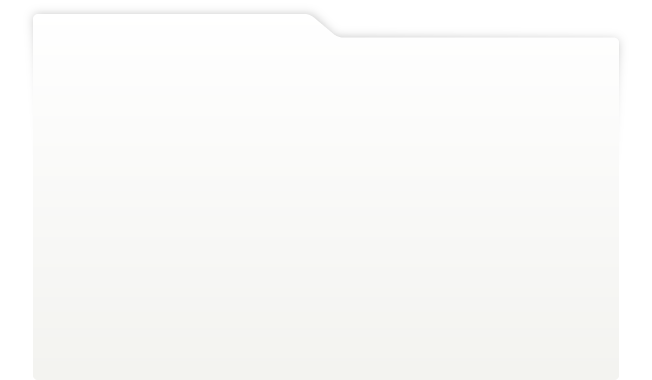
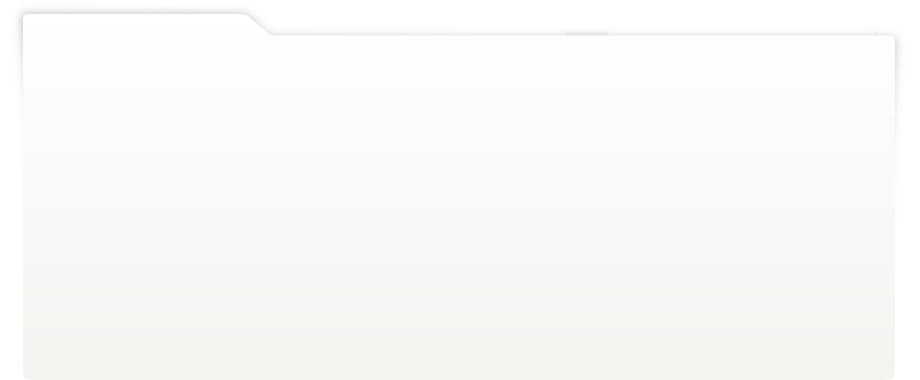
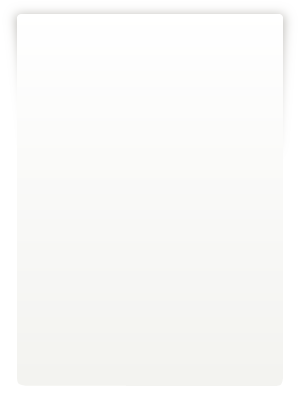
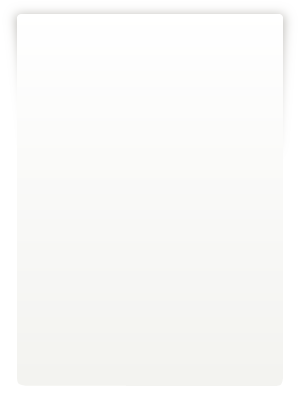
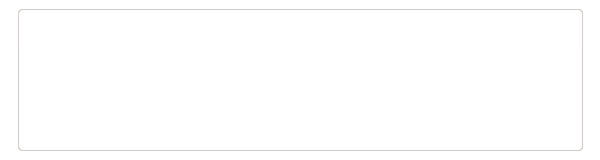
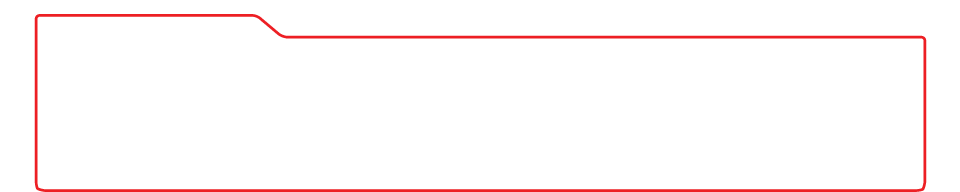
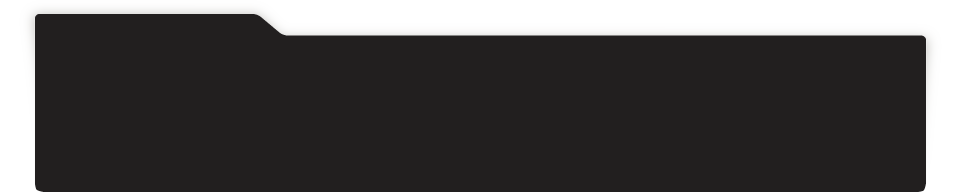
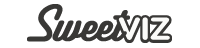
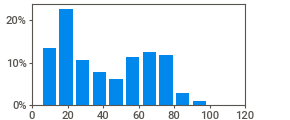
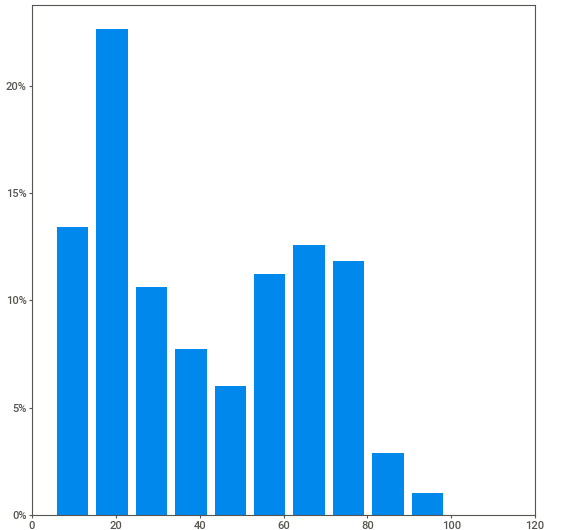
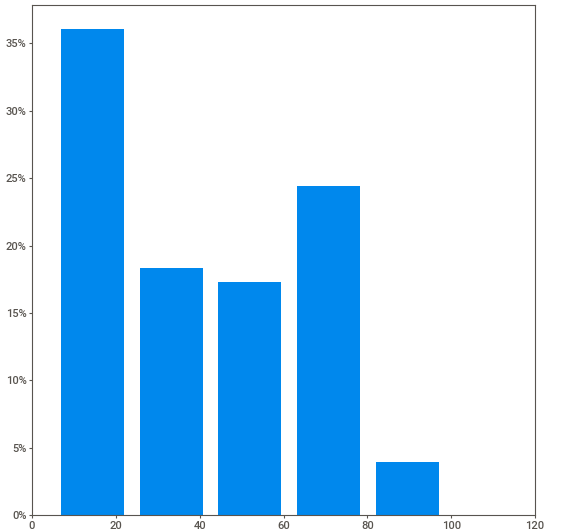
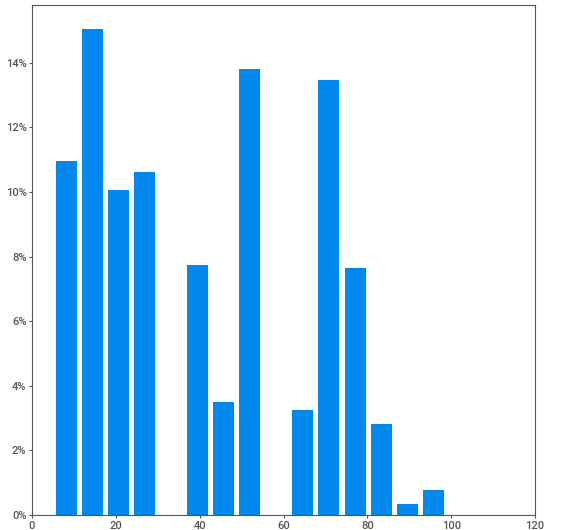
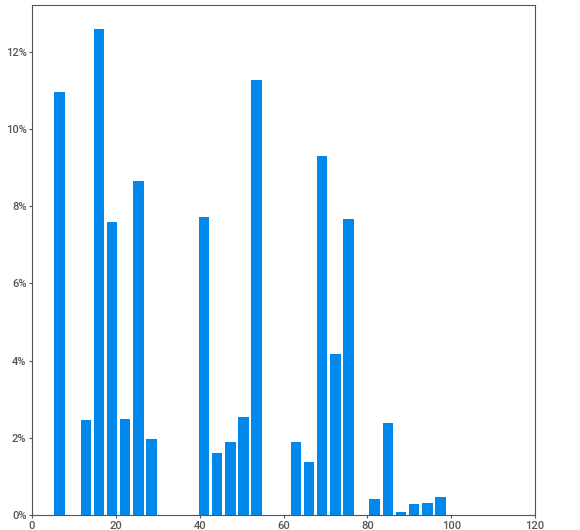
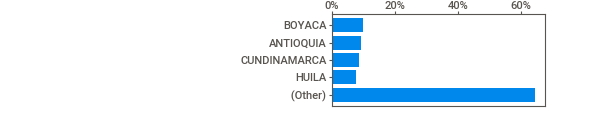
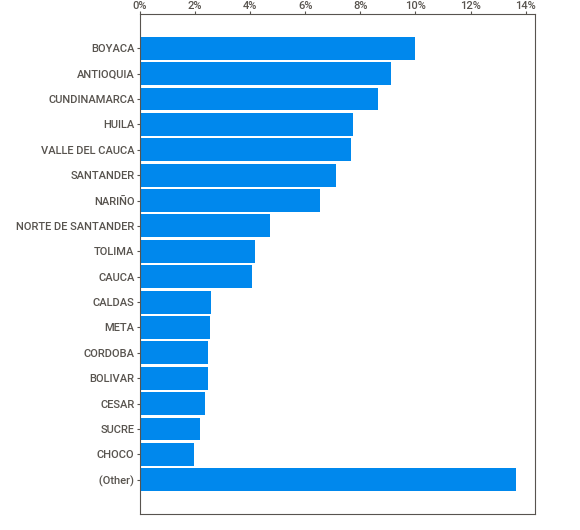
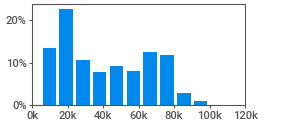
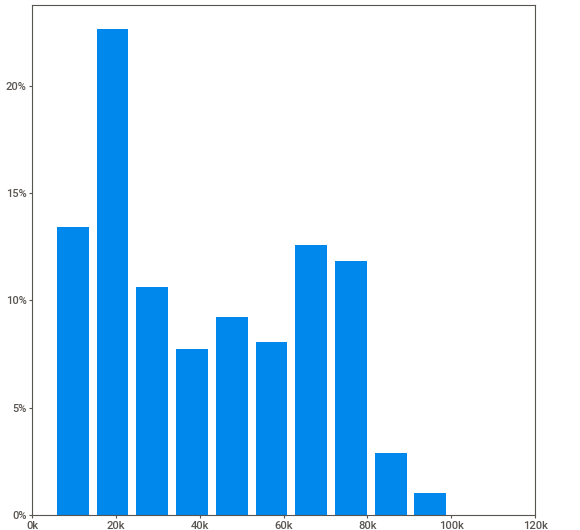
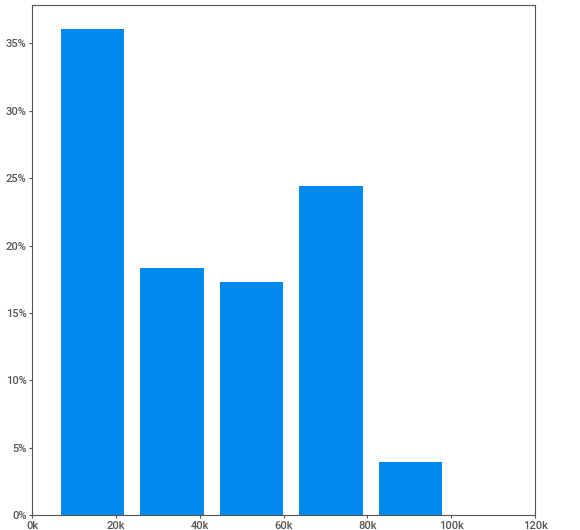
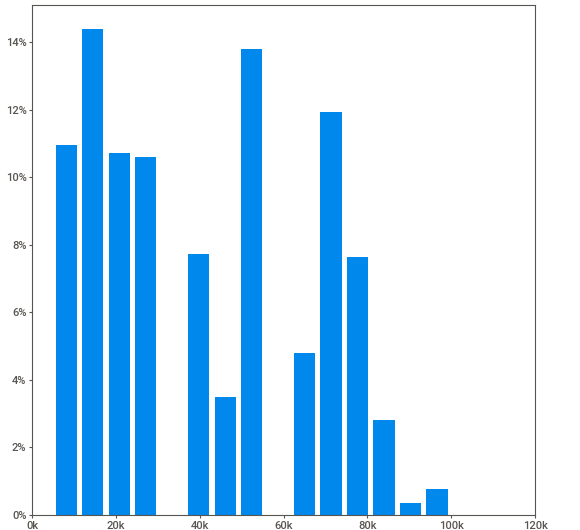
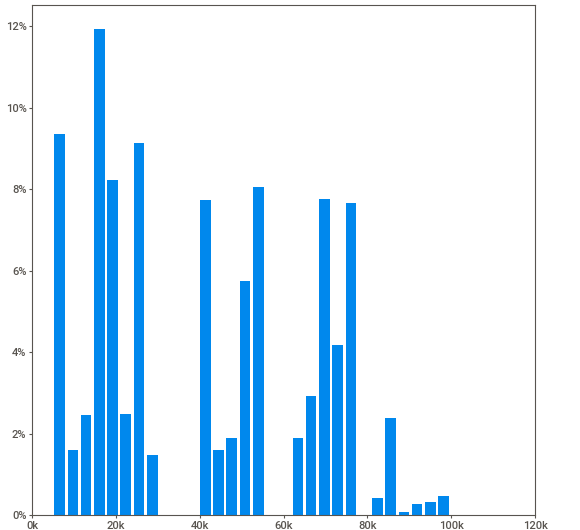
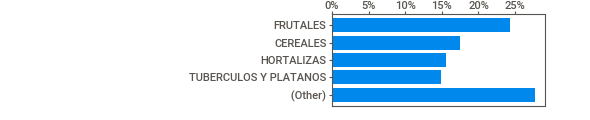
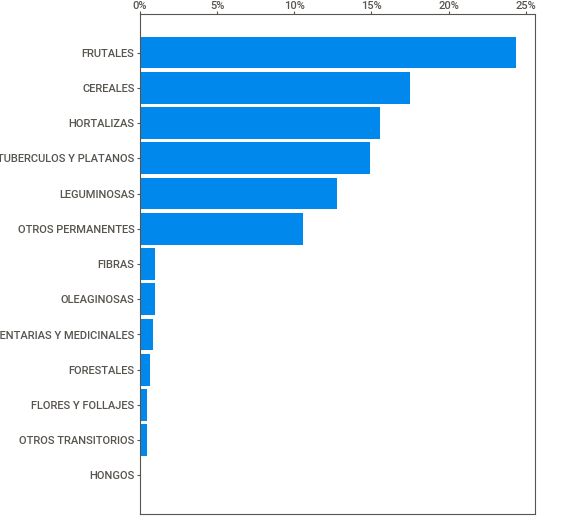
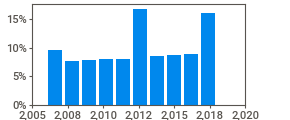
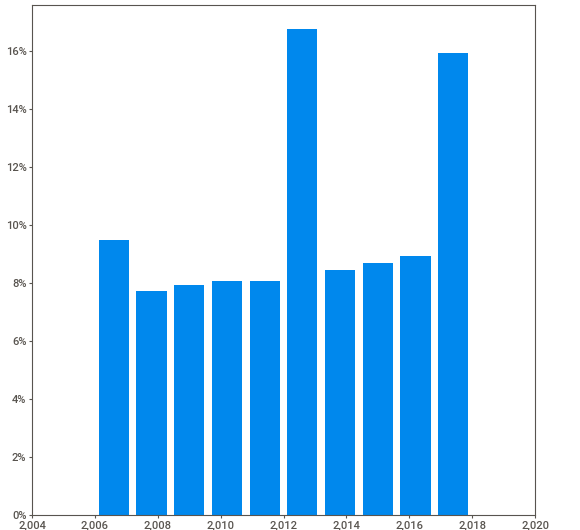
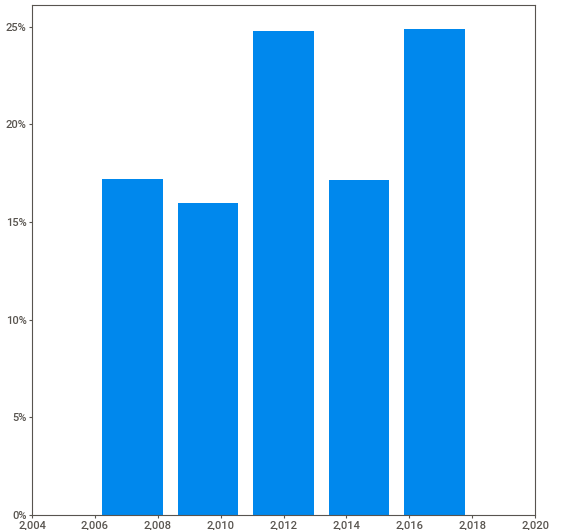
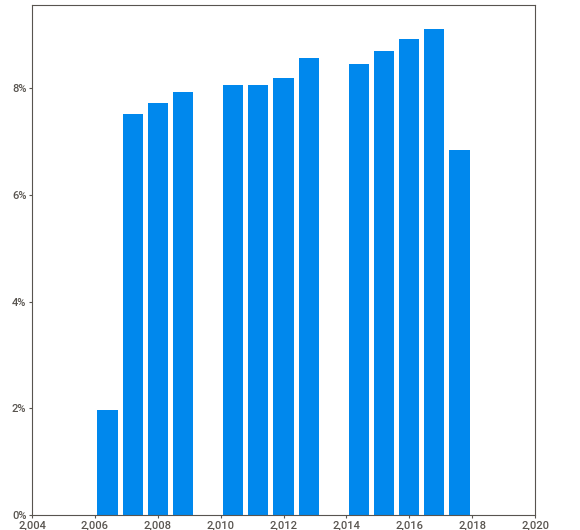
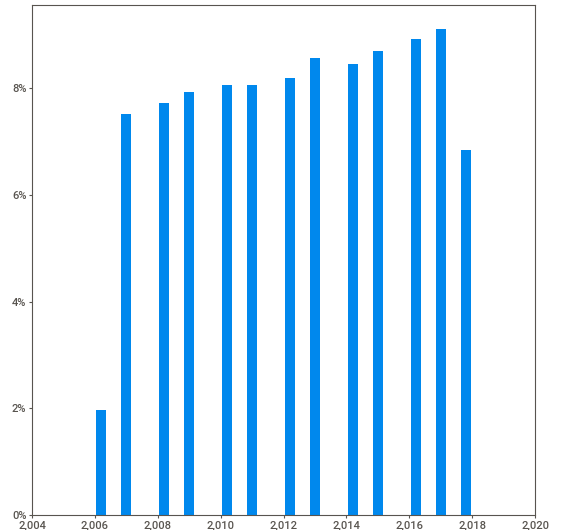
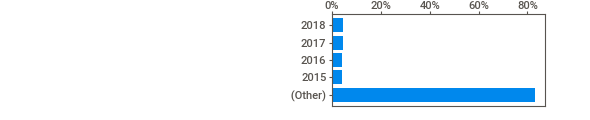
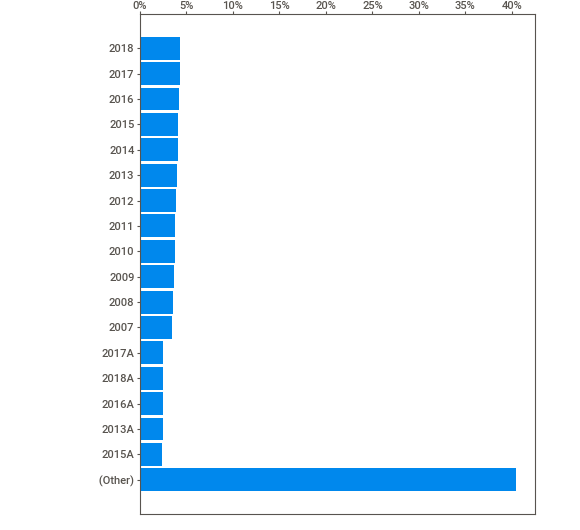
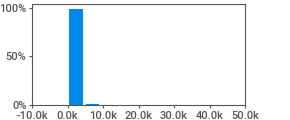
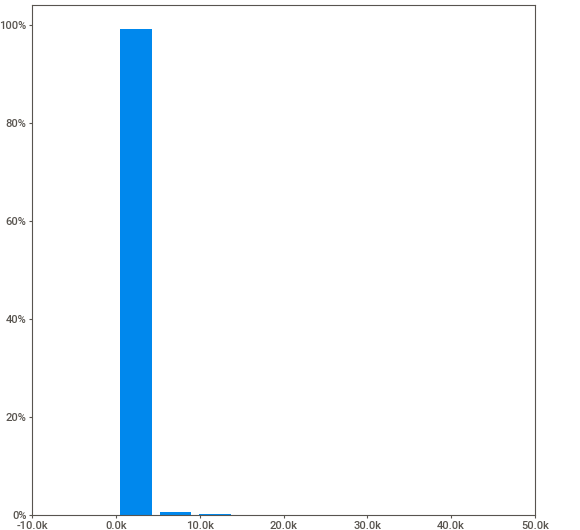
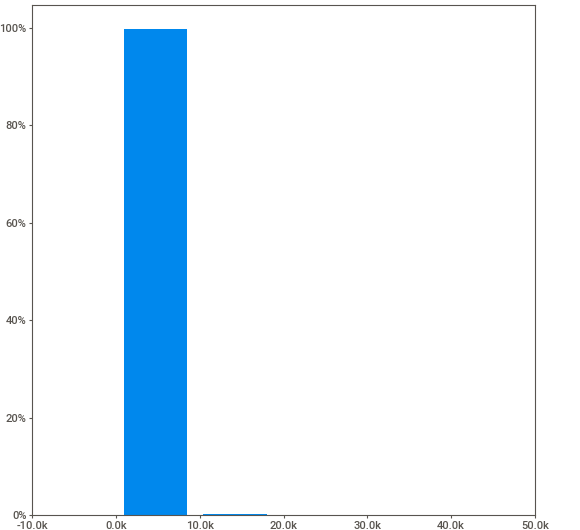
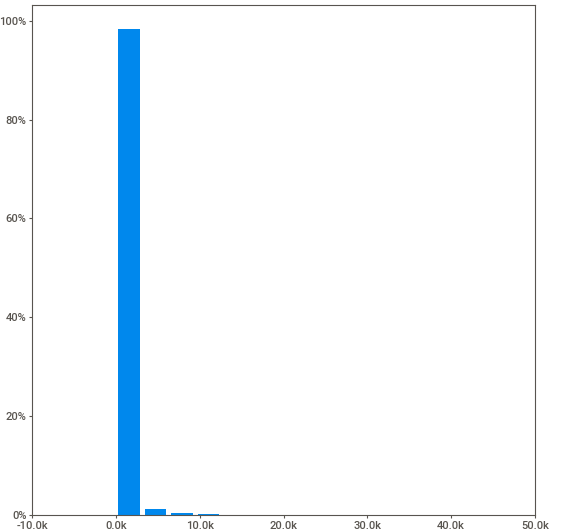
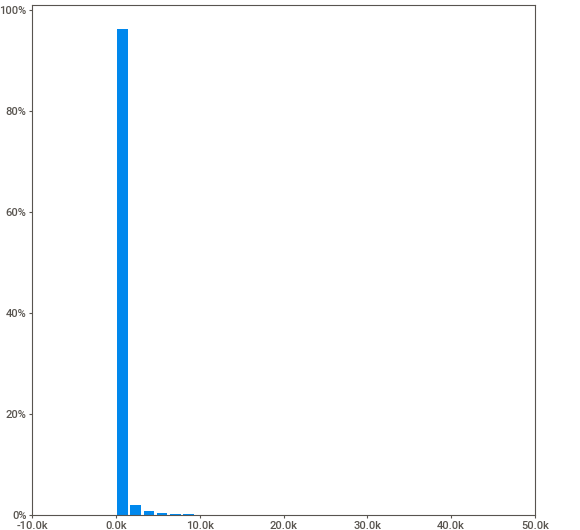
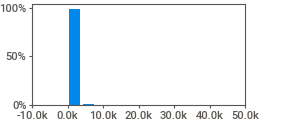
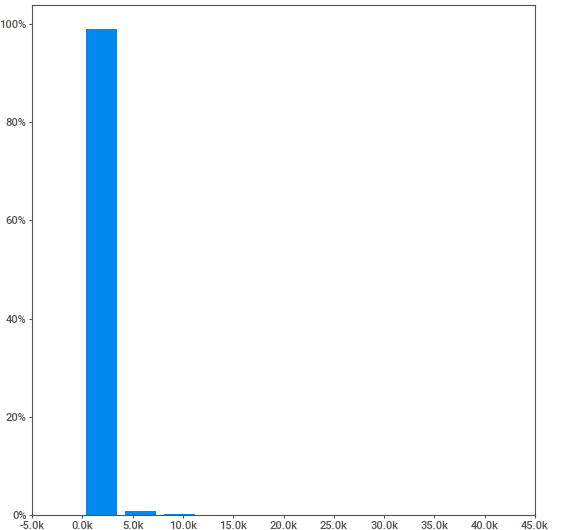
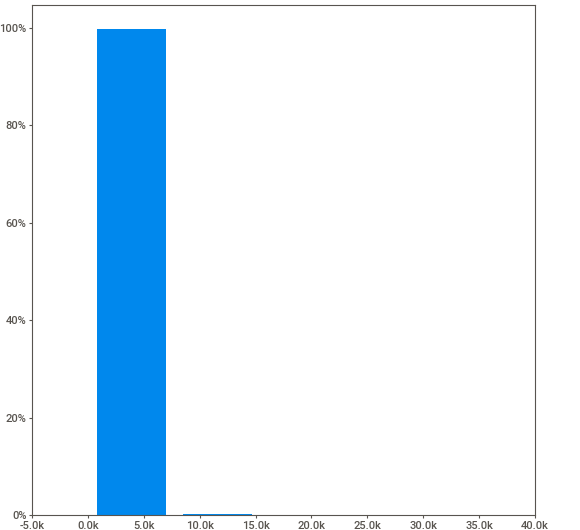
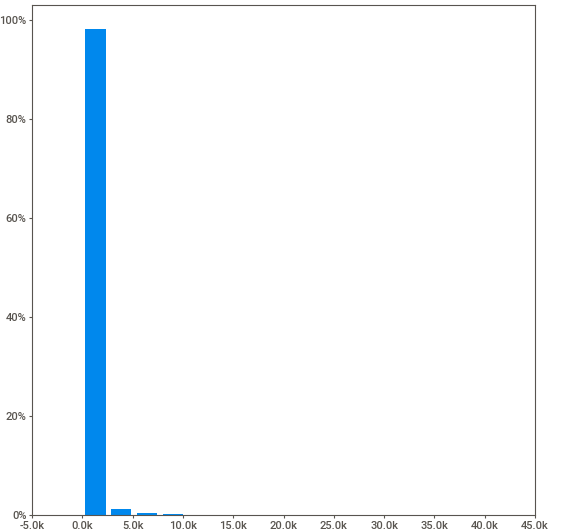
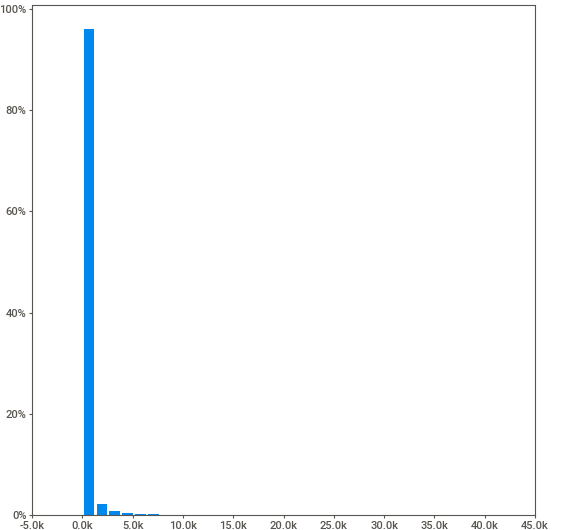
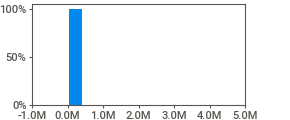
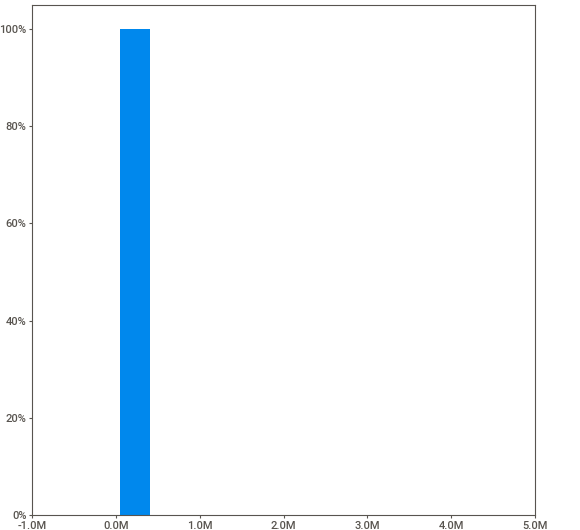
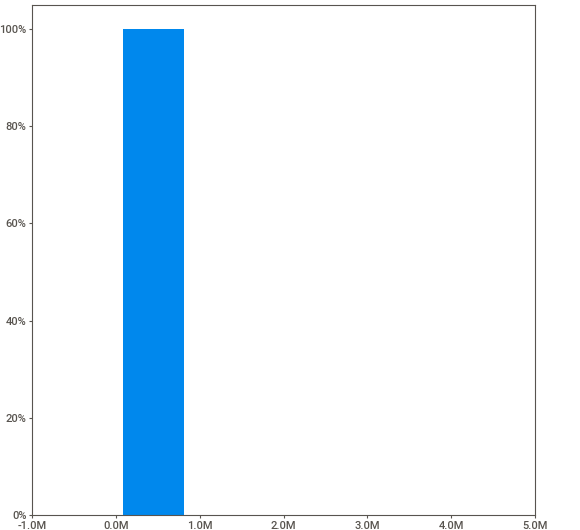
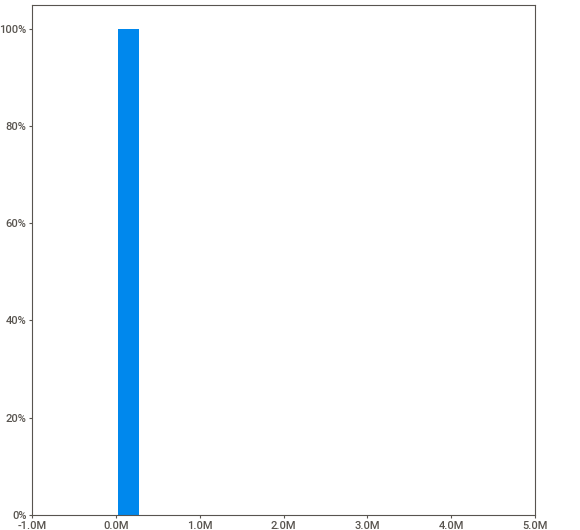
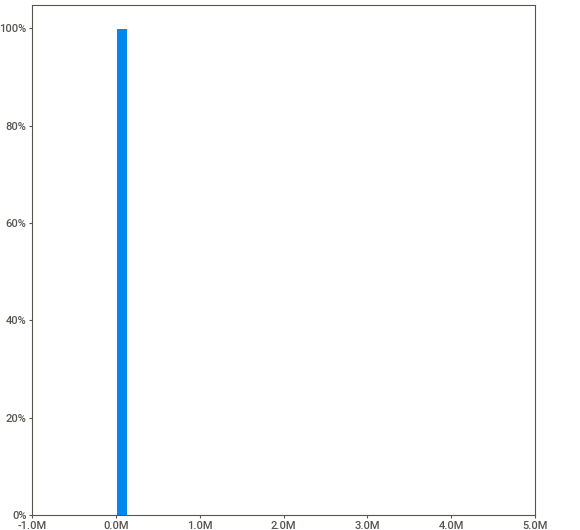
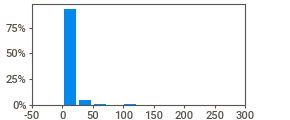
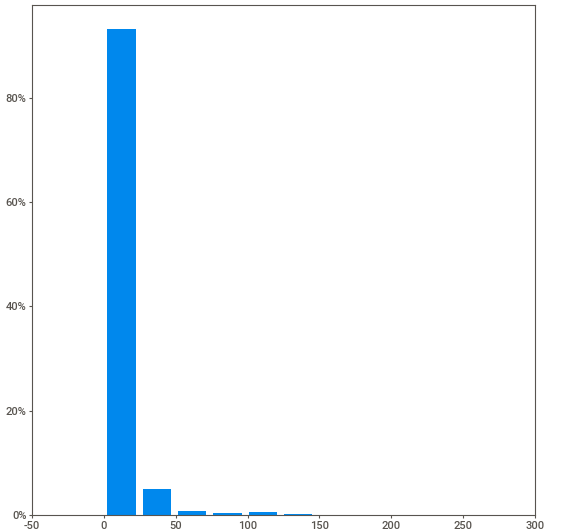
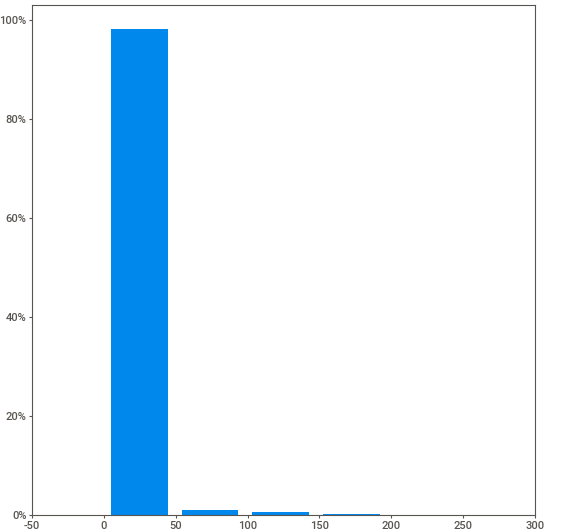
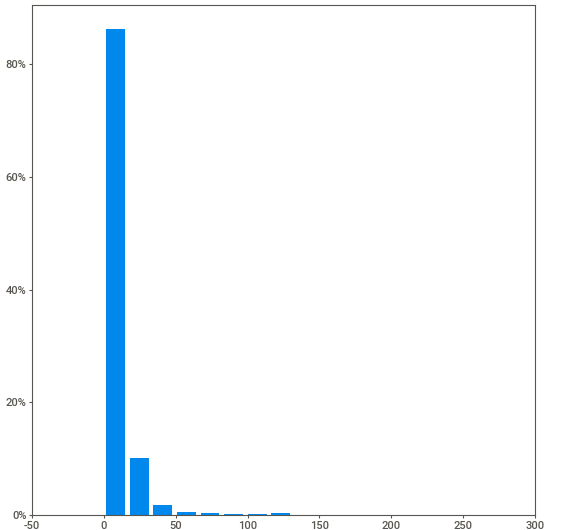
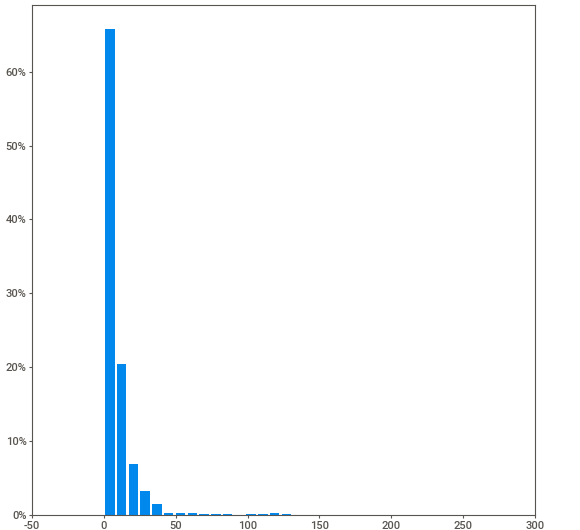
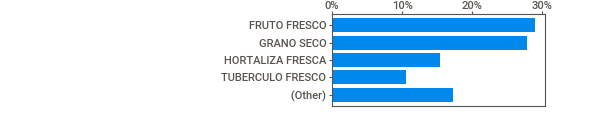
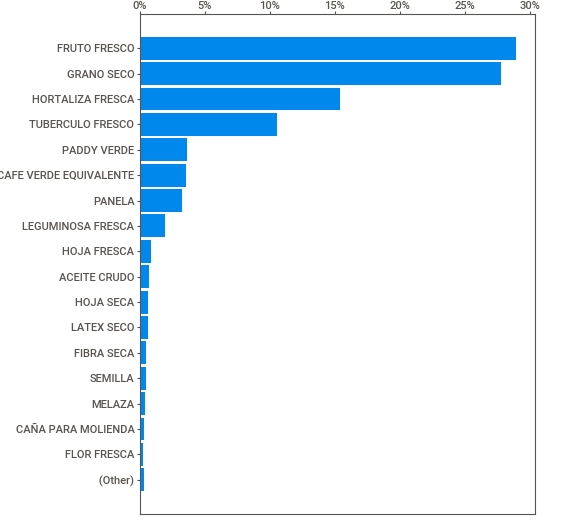
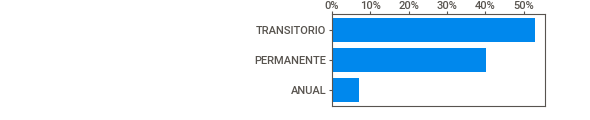
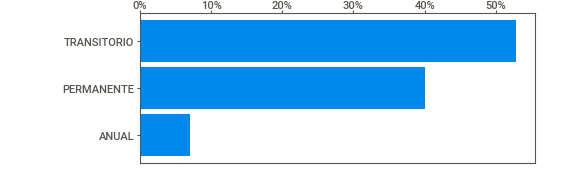
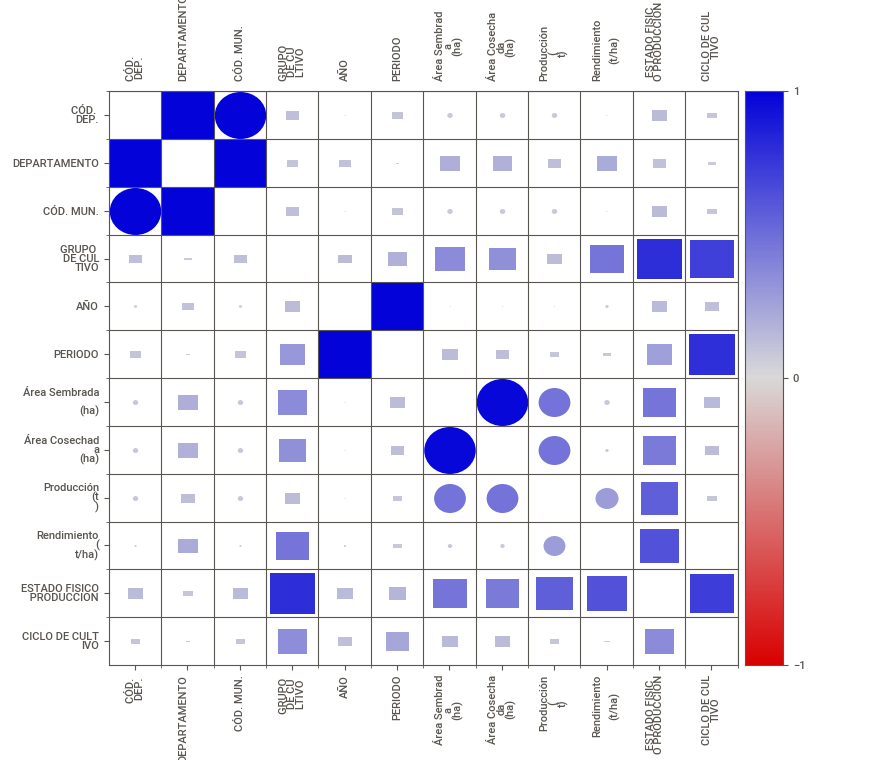
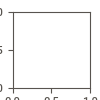

In [ ]:
#Generar reporte con sweetviz, que permitirá tener un vistazo inicial por medio de graficas.
#Además de ello, dará una primera noción de correlación entre las variables

reporte = sv.analyze(dataset)
reporte.show_notebook()

In [ ]:
#Se procede a profundizar el tema de correlación de variables para poder identificar las variables
# de entrada del modelo

#Esto para el caso de variables numéricas
dataset.corr(method="spearman")

,CÓD. \nDEP.,CÓD. MUN.,AÑO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha)
CÓD. \nDEP.,1.000000,0.997840,-0.017307,-0.013088,-0.005576,0.026803,0.058695
CÓD. MUN.,0.997840,1.000000,-0.016770,-0.012506,-0.005048,0.027169,0.058824
AÑO,-0.017307,-0.016770,1.000000,-0.036427,-0.034119,-0.007943,0.033765
Área Sembrada\n(ha),-0.013088,-0.012506,-0.036427,1.000000,0.964925,0.785308,-0.149525
Área Cosechada\n(ha),-0.005576,-0.005048,-0.034119,0.964925,1.000000,0.825127,-0.142113
Producción\n(t),0.026803,0.027169,-0.007943,0.785308,0.825127,1.000000,0.420654
Rendimiento\n(t/ha),0.058695,0.058824,0.033765,-0.149525,-0.142113,0.420654,1.000000


In [ ]:
#En forma de grafica se podria representar de dos formas:

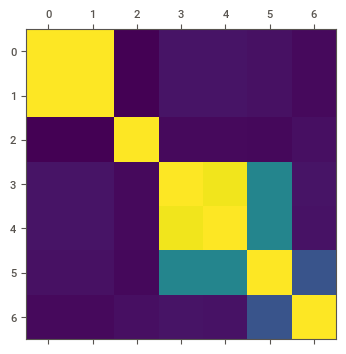

In [ ]:
#Sencilla
plt.matshow(dataset.corr())

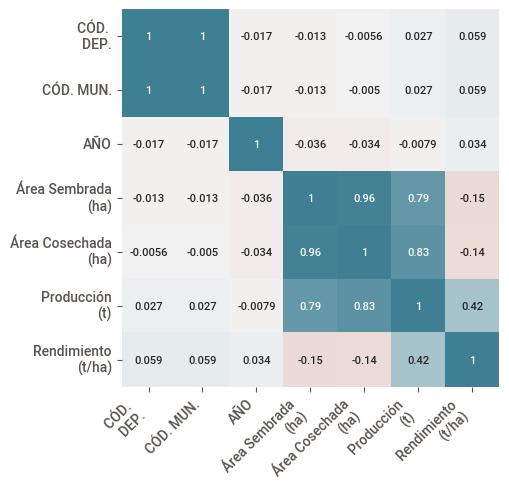

In [ ]:
#Avanzada:

corr_matrix = dataset.corr(method='spearman')
corr_matrix

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
#Para analizar dos variables categóricas en forma conjunta, se optó por usar tablas de doble entrada; 
#las cuales se conocen en estadística con el nombre de tabla de contingencia.

pd.crosstab(index=dataset['GRUPO \nDE CULTIVO'],
            columns=dataset['DEPARTAMENTO'], margins=True)

DEPARTAMENTO,AMAZONAS,ANTIOQUIA,ARAUCA,ATLANTICO,BOLIVAR,BOYACA,CALDAS,CAQUETA,CASANARE,CAUCA,...,QUINDIO,RISARALDA,SAN ANDRES Y PROVIDENCIA,SANTANDER,SUCRE,TOLIMA,VALLE DEL CAUCA,VAUPES,VICHADA,All
GRUPO DE CULTIVO,,,,,,,,,,,,,,,,,,,,,
CEREALES,81,2723,280,801,1725,3268,657,577,957,1371,...,376,331,16,2068,1597,1918,1839,67,118,36045
FIBRAS,0,263,0,18,52,78,75,0,7,108,...,0,21,0,107,109,189,104,0,10,1977
FLORES Y FOLLAJES,0,133,0,4,2,57,22,10,15,57,...,225,50,0,14,0,10,61,0,0,981
FORESTALES,0,248,0,0,33,0,54,188,67,0,...,10,0,0,176,0,11,0,0,20,1327
FRUTALES,200,4358,242,1422,939,4245,1259,471,760,1636,...,1113,811,57,3312,765,2187,4615,78,194,50236
HONGOS,0,0,0,0,0,2,0,0,0,0,...,0,6,0,0,0,0,2,0,0,16
HORTALIZAS,138,2635,0,661,344,3548,1007,84,88,1486,...,762,398,22,2375,161,695,3878,26,90,32032
LEGUMINOSAS,16,2445,0,441,281,4161,683,61,97,1291,...,497,394,0,2171,255,1048,2115,1,33,26368
OLEAGINOSAS,8,77,6,27,216,4,10,17,117,21,...,1,0,0,102,176,43,39,0,26,1967


In [ ]:
#Otras graficas que nos permiten ver aspectos como datos anómalos

#con lo anterior se decidió usar las variables de departamento, grupo de cultivo,
#cultivo, área sembrada (ha), producción\n(t), rendimiento(t/ha), ciclo de cultivo.
#Donde se tratará de revisar los datos anormales en la variables numéricas

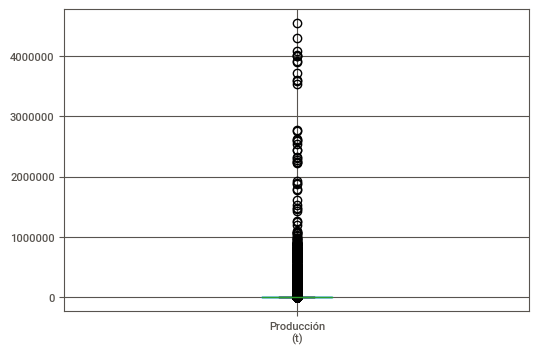

In [ ]:
dataset.boxplot(column=["Producción\n(t)"])  

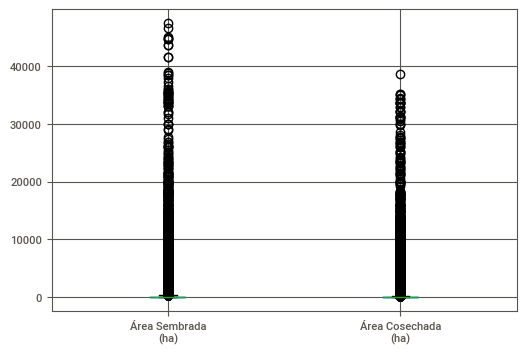

In [ ]:
dataset.boxplot(column=["Área Sembrada\n(ha)", "Área Cosechada\n(ha)"])  

Text(0, 0.5, 'Área Sembrada')

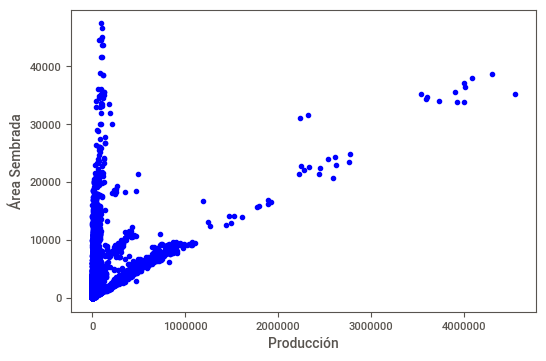

In [ ]:
plt.plot(dataset["Producción\n(t)"],dataset["Área Sembrada\n(ha)"],"bo")
plt.xlabel("Producción")
plt.ylabel("Área Sembrada")

Text(0, 0.5, 'Rendimiento')

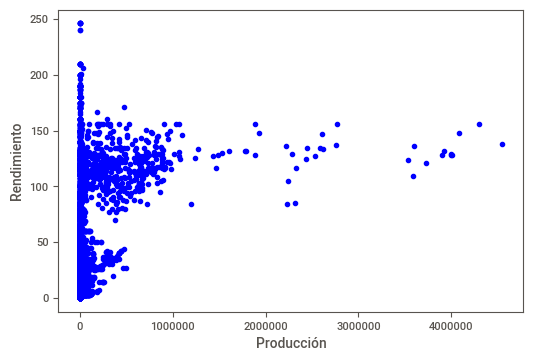

In [ ]:
plt.plot(dataset["Producción\n(t)"],dataset["Rendimiento\n(t/ha)"],"bo")
plt.xlabel("Producción")
plt.ylabel("Rendimiento")

# **Preprocesamiento de los datos**

## *Limpieza Inicial*

In [ ]:
#Inicialmente se eliminan los datos NA
dataset = dataset.dropna()

In [ ]:
#Luego de ello se procede a seleccionar las variables anteriormente mencionadas 
#e identificadas como prudentes para ser variables de entradas
data_clean= dataset.filter(items=['DEPARTAMENTO','GRUPO \nDE CULTIVO','CULTIVO','Área Sembrada\n(ha)','Producción\n(t)','Rendimiento\n(t/ha)','CICLO DE CULTIVO'])
data_clean.head()

,DEPARTAMENTO,GRUPO \nDE CULTIVO,CULTIVO,Área Sembrada\n(ha),Producción\n(t),Rendimiento\n(t/ha),CICLO DE CULTIVO
0,BOYACA,HORTALIZAS,ACELGA,2,1,1.00,TRANSITORIO
1,CUNDINAMARCA,HORTALIZAS,ACELGA,82,1440,18.00,TRANSITORIO
2,CUNDINAMARCA,HORTALIZAS,ACELGA,2,26,17.33,TRANSITORIO
3,NORTE DE SANTANDER,HORTALIZAS,ACELGA,3,48,16.00,TRANSITORIO
4,NORTE DE SANTANDER,HORTALIZAS,ACELGA,1,5,10.00,TRANSITORIO


In [ ]:
data_clean.describe(include="all")

,DEPARTAMENTO,GRUPO \nDE CULTIVO,CULTIVO,Área Sembrada\n(ha),Producción\n(t),Rendimiento\n(t/ha),CICLO DE CULTIVO
count,199801,199801,199801,199801.000000,1.998010e+05,199801.000000,199801
unique,32,13,213,NaN,NaN,NaN,3
top,BOYACA,FRUTALES,MAIZ,NaN,NaN,NaN,TRANSITORIO
freq,20118,48190,24917,NaN,NaN,NaN,106395
mean,NaN,NaN,NaN,298.377370,2.874777e+03,9.269454,NaN
std,NaN,NaN,NaN,1169.235245,4.581401e+04,14.964253,NaN
min,NaN,NaN,NaN,0.000000,0.000000e+00,0.030000,NaN
25%,NaN,NaN,NaN,10.000000,3.600000e+01,1.500000,NaN
50%,NaN,NaN,NaN,38.000000,1.500000e+02,5.000000,NaN
75%,NaN,NaN,NaN,160.000000,6.840000e+02,11.500000,NaN


In [ ]:
#Como se pudo presenciar con los box plots anteriores existen datos algo anormales, 
#por lo que se decide usa el método de quantiles para arreglar este tema

Q1 = dataset.quantile (q = .25)
Q3 = dataset.quantile (q = .75)

RIQ = Q3 - Q1

#data_clean = dataset [~ ((dataset <(Q1-1.5 * RIQ)) | (dataset> (Q3 + 1.5 * RIQ))). any (axis = 1)]
data_clean = data_clean[~ ((data_clean <(Q1-1.5 * RIQ)) | (data_clean> (Q3 + 1.5 * RIQ))). any (axis = 1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#Tamaño nuevo del Dataset
data_clean.shape

(153577, 7)

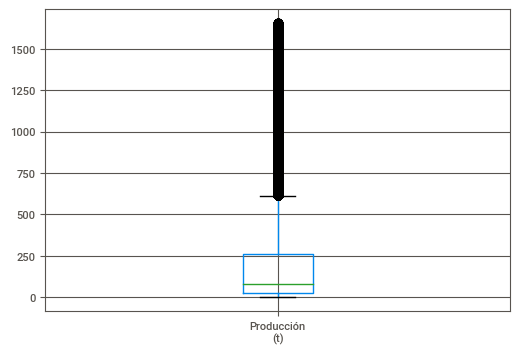

In [ ]:
data_clean.boxplot(column=["Producción\n(t)"])  

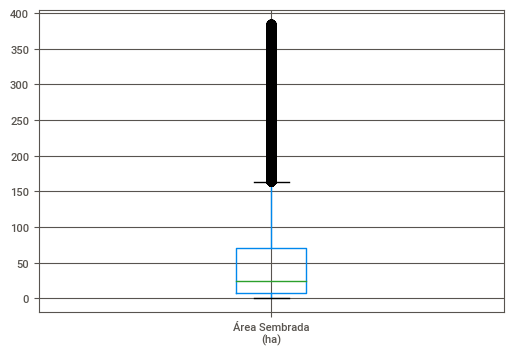

In [ ]:
data_clean.boxplot(column=["Área Sembrada\n(ha)"])  

In [ ]:
#Es necesario realizar un proceso de filtrado por que se tienen valores que componen
#a los atributos o características que tienen una baja participación,
#Estos filtros se ejecutarán en las variables categóricas Departamento, Grupo de cultivo y cultivo

listaDept = ["BOYACA","ANTIOQUIA","CUNDINAMARCA","VALLE DEL CAUCA","HUILA","SANTANDER","NARIÑO","NORTE DE SANTANDER","TOLIMA","CAUCA","CALDAS","META"]
listGrupoCultivo = ['FRUTALES','CEREALES','TUBERCULOS Y PLATANOS','HORTALIZAS','LEGUMINOSAS','OTROS PERMANENTES']
listaCultivo = ['MAIZ','FRIJOL','ARVEJA','TOMATE','YUCA','PAPA','CAÑA PANELERA','PLATANO','CACAO','HABICHUELA','AGUACATE','MORA','LULO','CAFE','TOMATE DE ARBOL']

dtPrueba1 = pd.DataFrame()
dtPrueba2 = pd.DataFrame()
dtFinal = pd.DataFrame()
for i in range(len(listaDept)):
    #print(listaDept[i])
    dtPrueba1  = dtPrueba1.append(data_clean[data_clean['DEPARTAMENTO'] == listaDept[i]])
    #X = (X[X['DEPARTAMENTO'] == listaDept[i]])

for i in range(len(listGrupoCultivo)):
    #print(listGrupoCultivo[i])
    dtPrueba2 = dtPrueba2.append(dtPrueba1[dtPrueba1 ['GRUPO \nDE CULTIVO'] == listGrupoCultivo[i]])
    #X = (X[X['GRUPO \nDE CULTIVO'] == listGrupoCultivo[i]])

for i in range(len(listaCultivo)):
    #print(listaCultivo[i])
    dtFinal = dtFinal.append(dtPrueba2[dtPrueba2['CULTIVO'] == listaCultivo[i]])
    #X = (X[X['CULTIVO'] == listaCultivo[i]])

dtFinal


,DEPARTAMENTO,GRUPO \nDE CULTIVO,CULTIVO,Área Sembrada\n(ha),Producción\n(t),Rendimiento\n(t/ha),CICLO DE CULTIVO
107809,BOYACA,CEREALES,MAIZ,15,25,1.7,TRANSITORIO
107810,BOYACA,CEREALES,MAIZ,10,25,2.5,TRANSITORIO
108023,BOYACA,CEREALES,MAIZ,2,3,1.6,TRANSITORIO
108223,BOYACA,CEREALES,MAIZ,190,380,2.0,TRANSITORIO
108224,BOYACA,CEREALES,MAIZ,20,72,3.6,TRANSITORIO
...,...,...,...,...,...,...,...
188820,META,FRUTALES,TOMATE DE ARBOL,28,575,25.0,PERMANENTE
189063,META,FRUTALES,TOMATE DE ARBOL,23,396,22.0,PERMANENTE
189297,META,FRUTALES,TOMATE DE ARBOL,5,50,10.0,PERMANENTE
189535,META,FRUTALES,TOMATE DE ARBOL,4,40,10.0,PERMANENTE


In [ ]:
#Cantidad total de filas y columnas luego del filtro
dtFinal.shape

(70355, 7)

                                             |          | [  0%]   00:00 -> (? left)


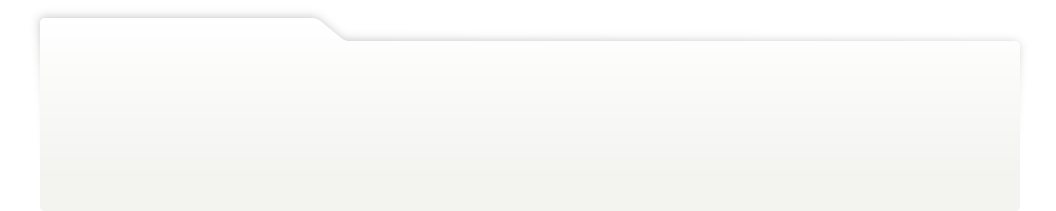
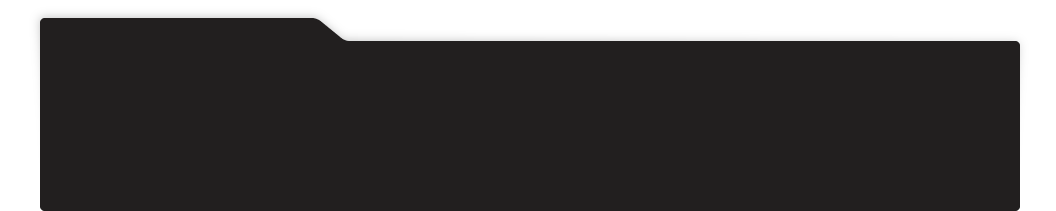
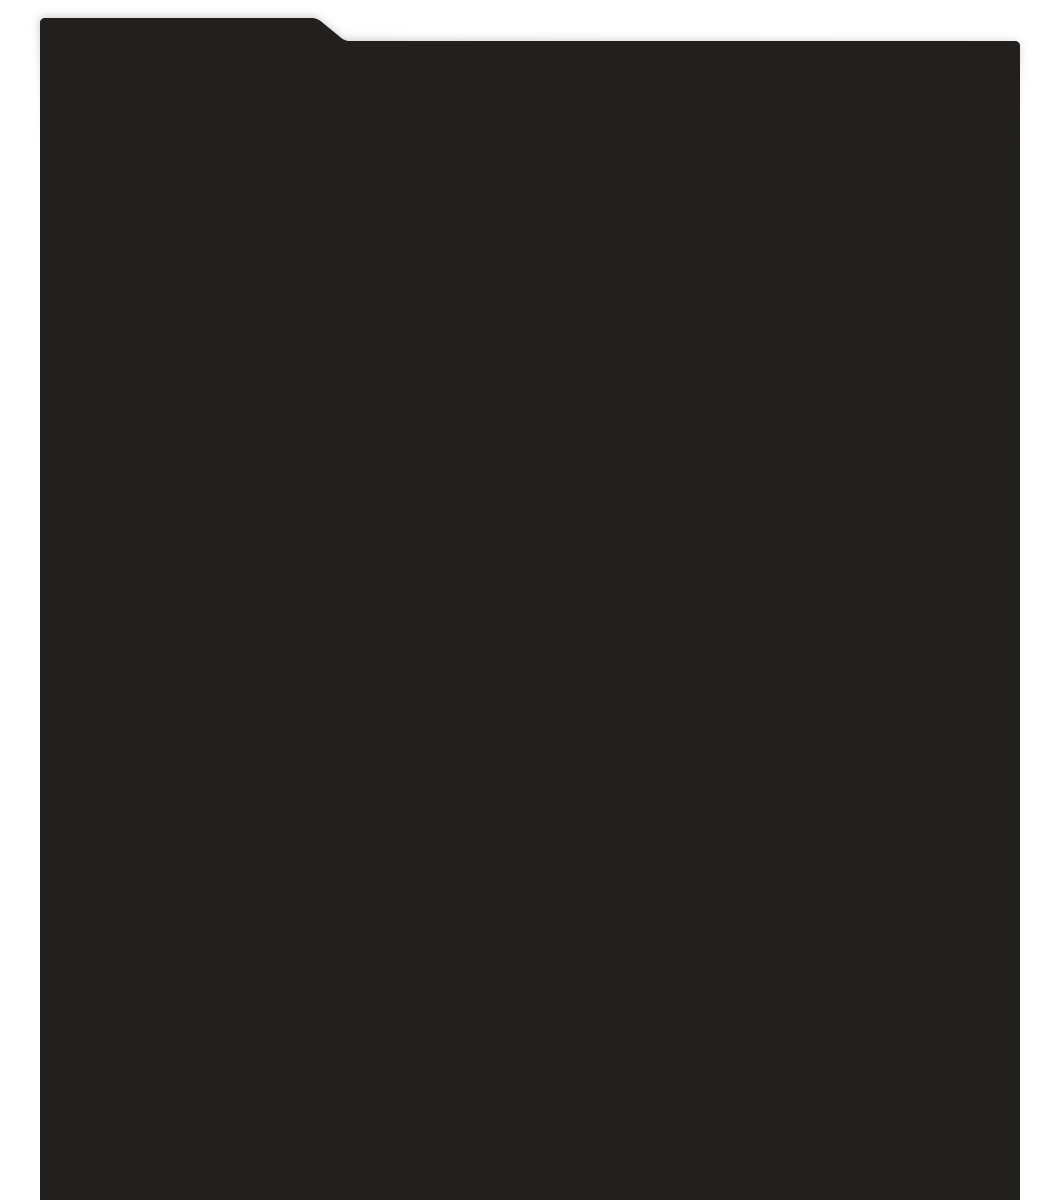
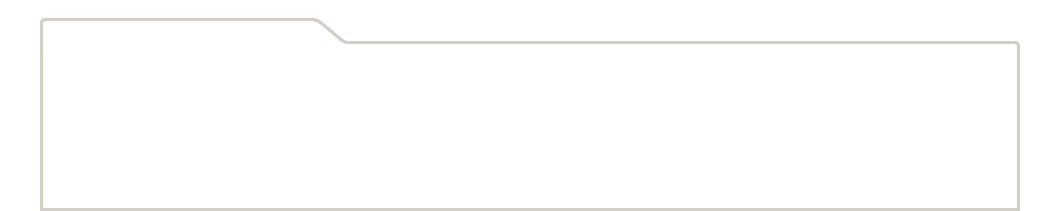
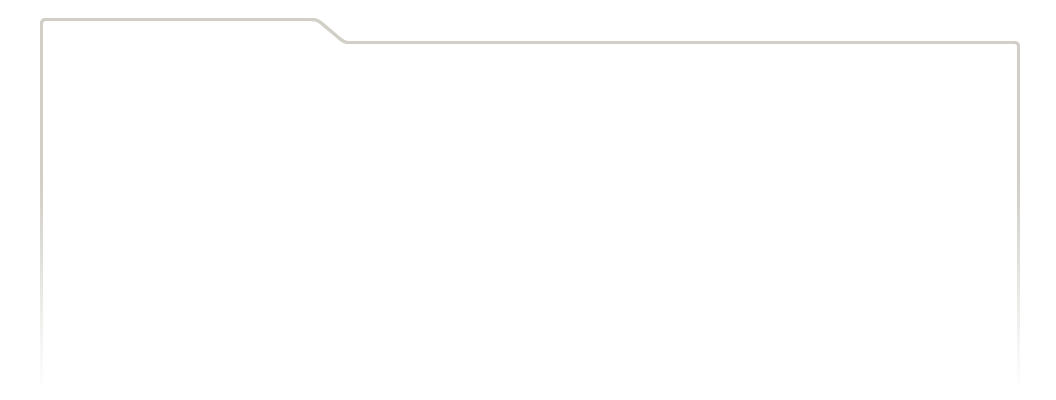
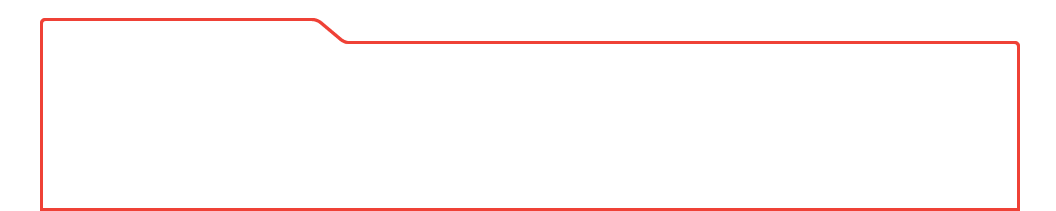
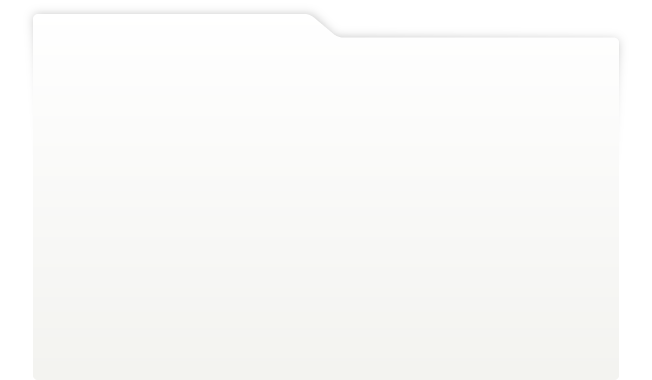
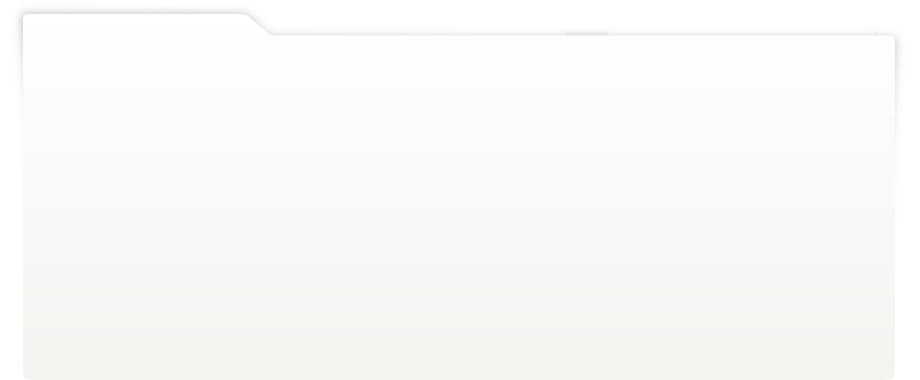
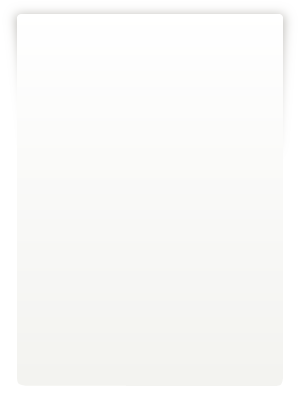
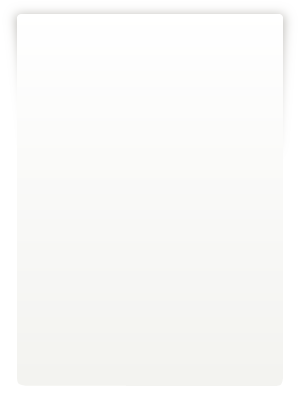
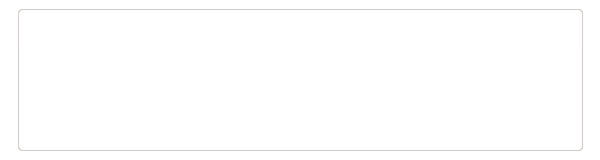
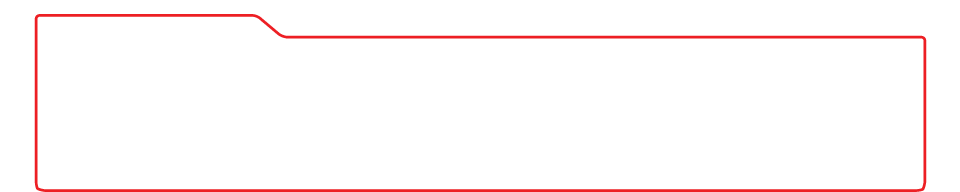
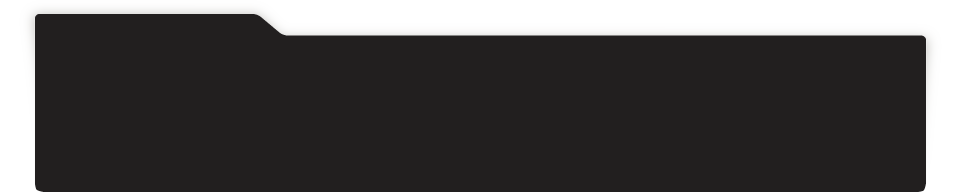
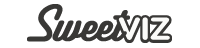
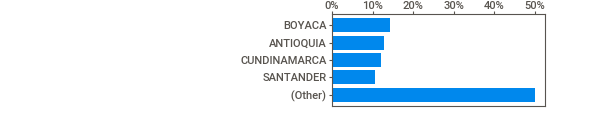
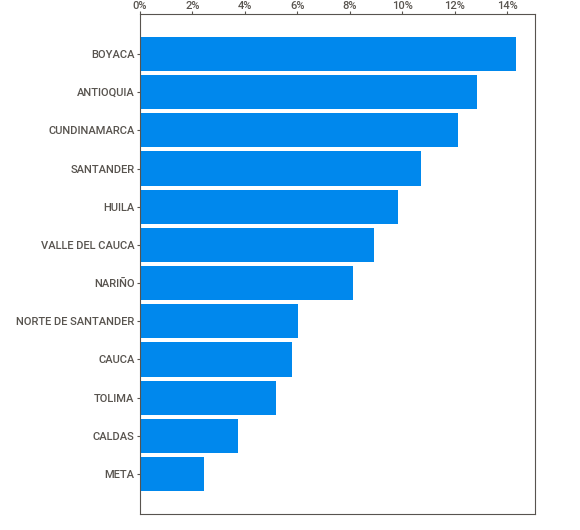
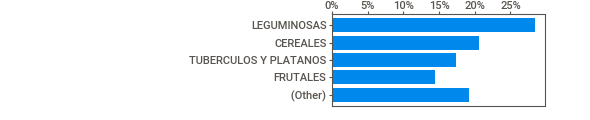
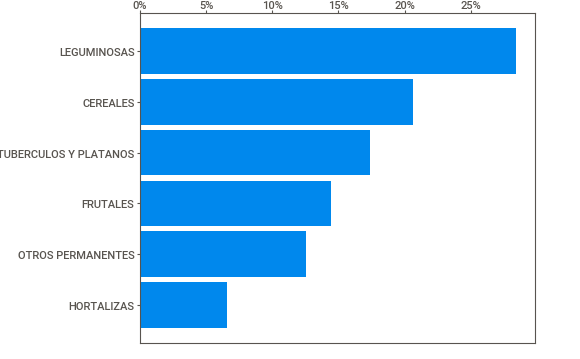
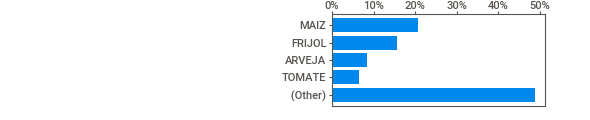
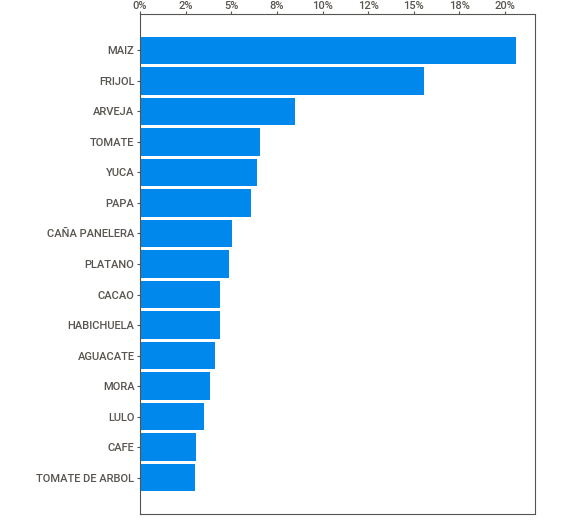
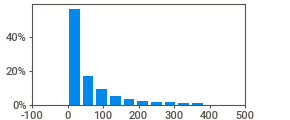
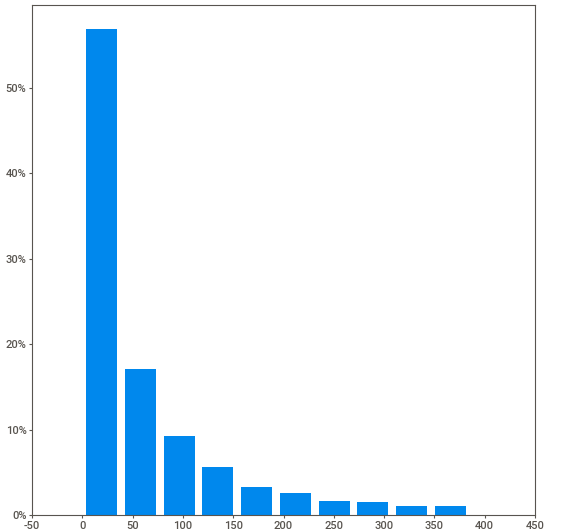
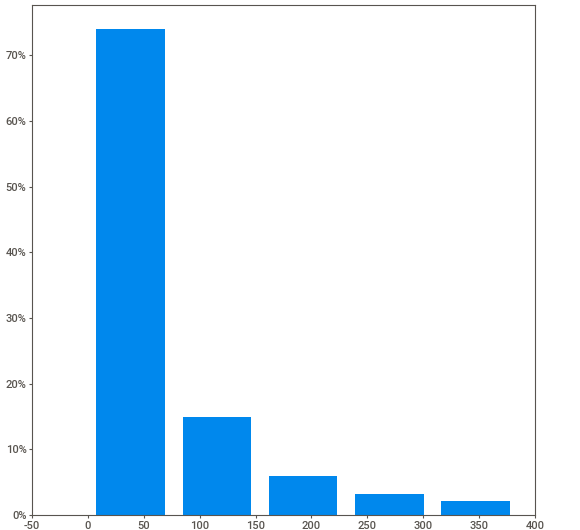
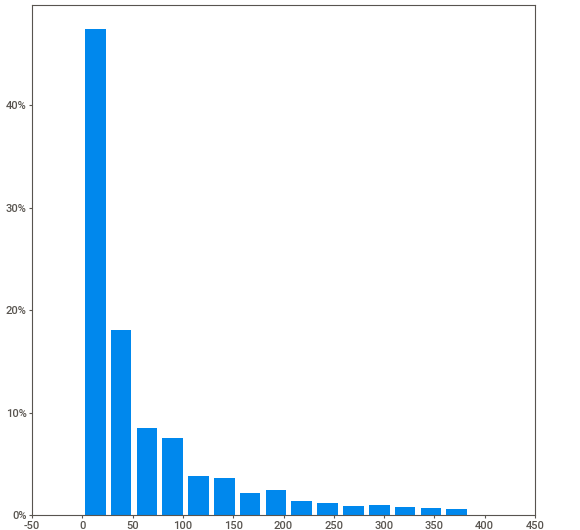
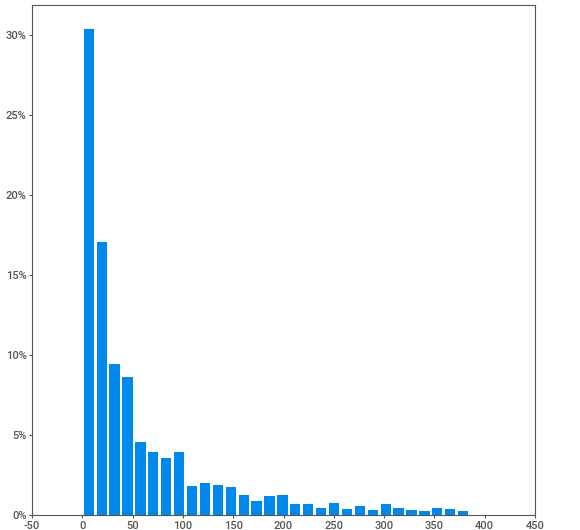
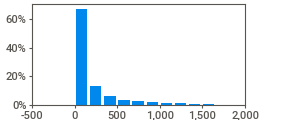
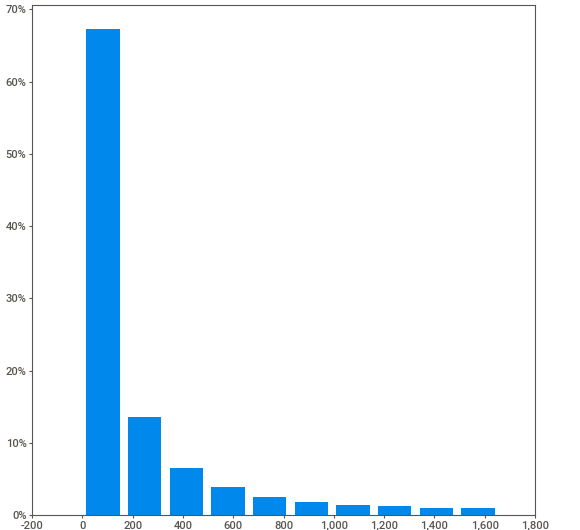
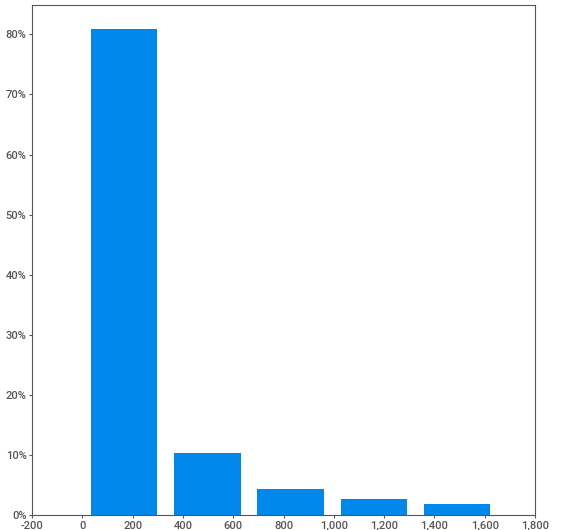
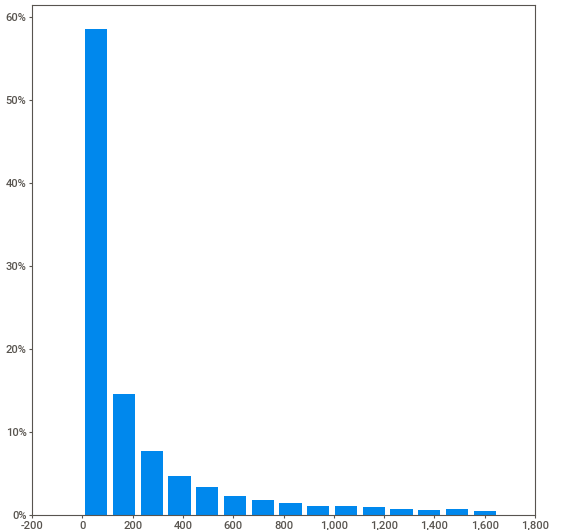
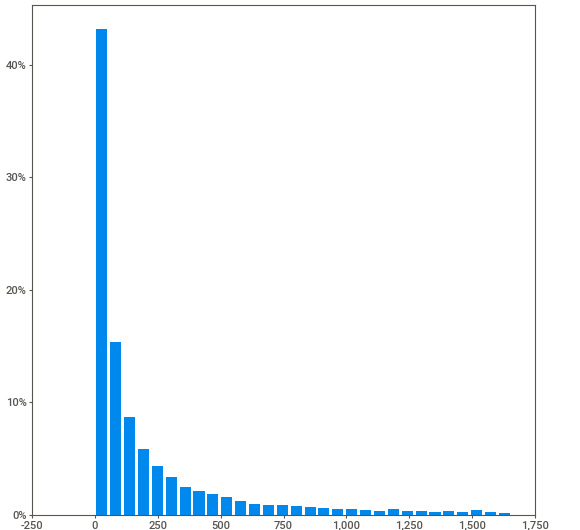
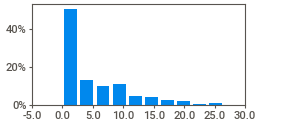
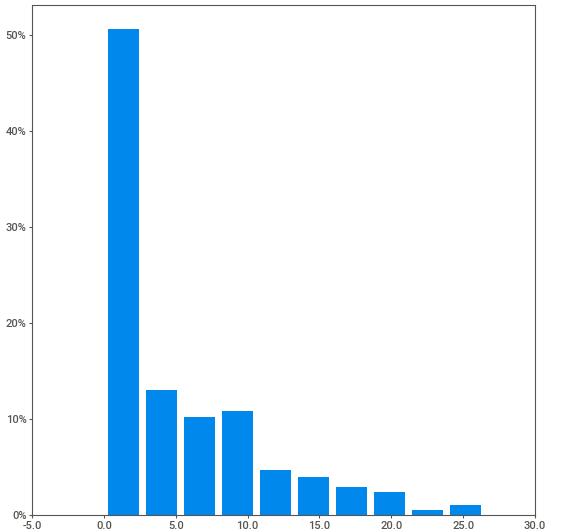
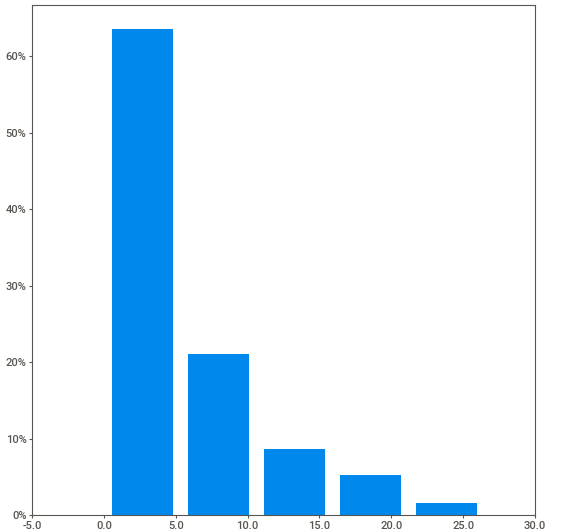
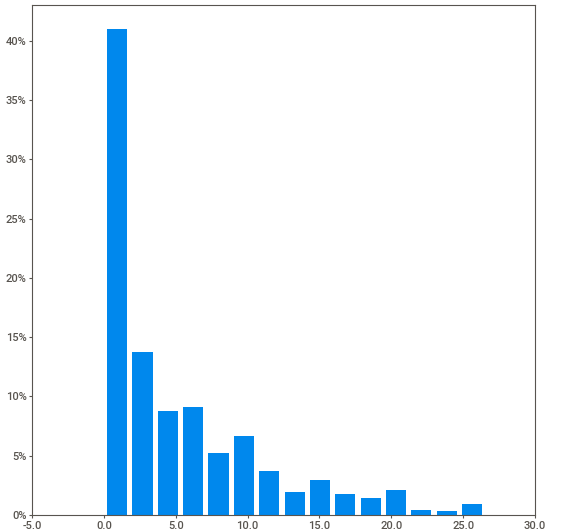
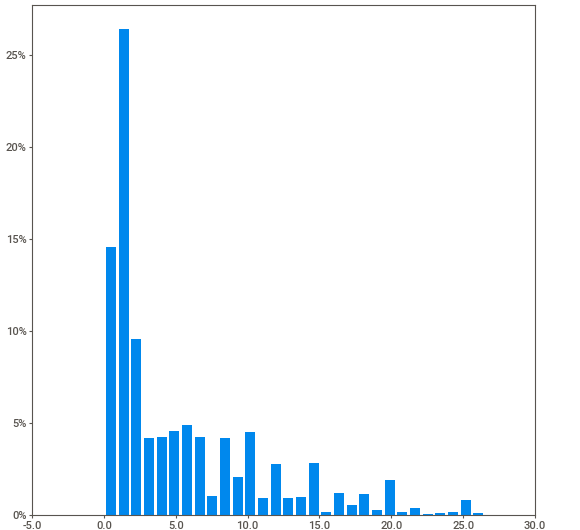
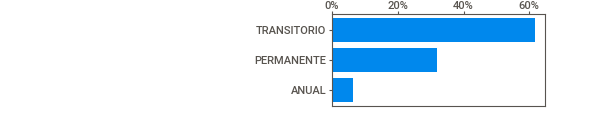
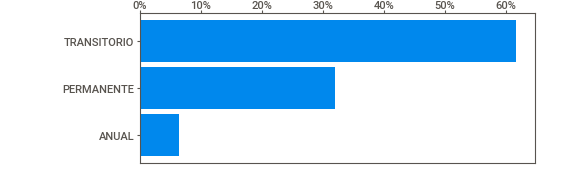
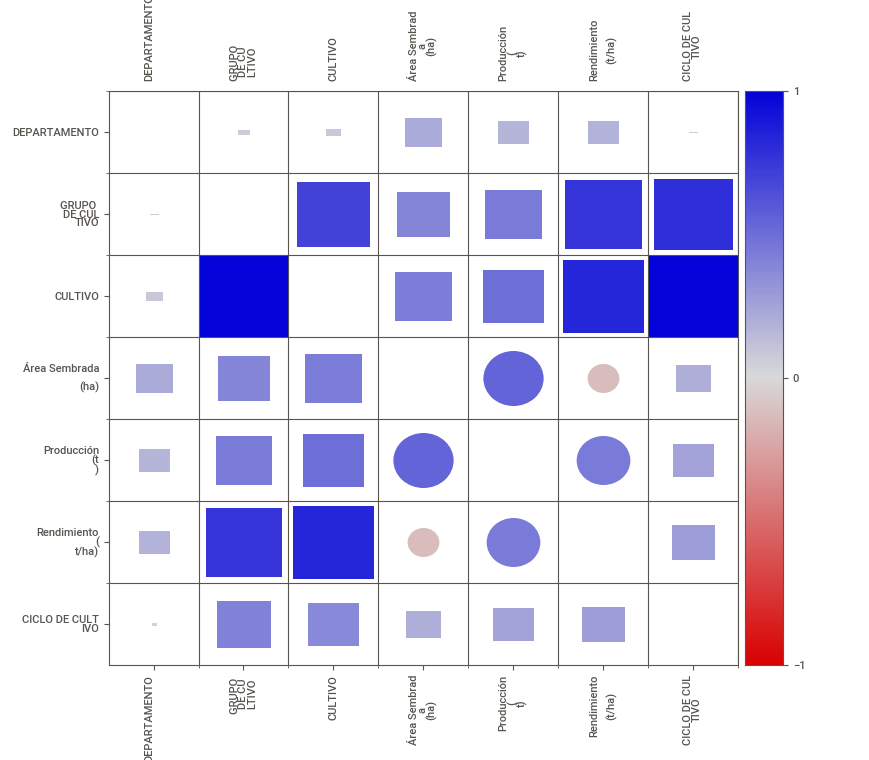
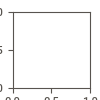

In [ ]:
#Se vuelve a generar un reporte con sweetviz
reporte = sv.analyze(dtFinal)
reporte.show_notebook()

In [ ]:
# Separando variables de salida y entrada
X = dtFinal.filter(items=['DEPARTAMENTO','GRUPO \nDE CULTIVO','CULTIVO','Área Sembrada\n(ha)','Rendimiento\n(t/ha)','CICLO DE CULTIVO'])

y = dtFinal.filter(items=['Producción\n(t)'])

In [ ]:
X.head()

,DEPARTAMENTO,GRUPO \nDE CULTIVO,CULTIVO,Área Sembrada\n(ha),Rendimiento\n(t/ha),CICLO DE CULTIVO
107809,BOYACA,CEREALES,MAIZ,15,1.7,TRANSITORIO
107810,BOYACA,CEREALES,MAIZ,10,2.5,TRANSITORIO
108023,BOYACA,CEREALES,MAIZ,2,1.6,TRANSITORIO
108223,BOYACA,CEREALES,MAIZ,190,2.0,TRANSITORIO
108224,BOYACA,CEREALES,MAIZ,20,3.6,TRANSITORIO


In [ ]:
y.head()

,Producción\n(t)
107809,25
107810,25
108023,3
108223,380
108224,72


In [ ]:
#Separando variables categoricas de numericas

varCategoricas = dtFinal.filter(items=['DEPARTAMENTO','GRUPO \nDE CULTIVO','CULTIVO','CICLO DE CULTIVO'])
varCategoricas

,DEPARTAMENTO,GRUPO \nDE CULTIVO,CULTIVO,CICLO DE CULTIVO
107809,BOYACA,CEREALES,MAIZ,TRANSITORIO
107810,BOYACA,CEREALES,MAIZ,TRANSITORIO
108023,BOYACA,CEREALES,MAIZ,TRANSITORIO
108223,BOYACA,CEREALES,MAIZ,TRANSITORIO
108224,BOYACA,CEREALES,MAIZ,TRANSITORIO
...,...,...,...,...
188820,META,FRUTALES,TOMATE DE ARBOL,PERMANENTE
189063,META,FRUTALES,TOMATE DE ARBOL,PERMANENTE
189297,META,FRUTALES,TOMATE DE ARBOL,PERMANENTE
189535,META,FRUTALES,TOMATE DE ARBOL,PERMANENTE


## *Convirtiendo variables categóricas a numéricas*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto',
                       drop='first', # devuelve k-1, usa drop=false para devolver k dummies
                       sparse=False)

encoder.fit(varCategoricas.fillna('Missing'))

OneHotEncoder(drop='first', sparse=False)

In [ ]:
encoder.categories_

[array(['ANTIOQUIA', 'BOYACA', 'CALDAS', 'CAUCA', 'CUNDINAMARCA', 'HUILA',
        'META', 'NARIÑO', 'NORTE DE SANTANDER', 'SANTANDER', 'TOLIMA',
        'VALLE DEL CAUCA'], dtype=object),
 array(['CEREALES', 'FRUTALES', 'HORTALIZAS', 'LEGUMINOSAS',
        'OTROS PERMANENTES', 'TUBERCULOS Y PLATANOS'], dtype=object),
 array(['AGUACATE', 'ARVEJA', 'CACAO', 'CAFE', 'CAÑA PANELERA', 'FRIJOL',
        'HABICHUELA', 'LULO', 'MAIZ', 'MORA', 'PAPA', 'PLATANO', 'TOMATE',
        'TOMATE DE ARBOL', 'YUCA'], dtype=object),
 array(['ANUAL', 'PERMANENTE', 'TRANSITORIO'], dtype=object)]

In [ ]:
dtCategoricas = encoder.transform(varCategoricas)

varCategoricas = pd.DataFrame(dtCategoricas)
varCategoricas

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70350,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
70351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
70352,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
70353,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#Concatenar con las numéricas para ingresar al modelo
num = dtFinal.filter(items=['Área Sembrada\n(ha)','Rendimiento\n(t/ha)'])
num = num.reset_index()
num = num.drop(['index'],axis = 1)
num

X = pd.concat([varCategoricas,num],axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,Área Sembrada\n(ha),Rendimiento\n(t/ha)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15,1.7
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10,2.5
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1.6
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,190,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70350,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28,25.0
70351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,23,22.0
70352,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5,10.0
70353,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4,10.0


# **Modelo**

## *Partiendo los datos en datos de entrenamiento y prueba*


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## *Crear el Objeto Regresor del modelo XGBoost*

In [ ]:
from xgboost import XGBRegressor

regresor = XGBRegressor(learning_rate = 0.05, n_estimators=40, max_depth= 3)
regresor 

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=40, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

## *Entrenando el modelo*


In [ ]:
modelo=regresor.fit(X_train,y_train)

## *Realizando la predicción*

In [ ]:
y_pred = regresor.predict(X_test)

## *Métricas del modelo*

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regresor, X = X_train, y = y_train, cv = 10)


In [ ]:
accuracies.mean()

0.8493185014383154

In [ ]:
accuracies.std()

0.003558558771355094

# **Implementación**

Este proyecto se relaciona directamente con la agricultura campesina, ya que implementando este modelo entrenado se puede llegar a mejorar la toma de decisiones por parte del campesino al momento de invertir en un terreno, o querer expandir su comercio. Este modelo puede ser implementado para crear una interfaz o un aplicativo en donde se puedan ingresar algunas características como el área a sembrar, el departamento y el tipo de cultivo que se quiera y con esto dar una visualización de la producción que se podría llegar a obtener.

# **Conclusiones**

Se puede concluir que este tipo de modelos constituyen una herramienta muy útil para poder desarrollar una agricultura eficiente y poder llegar a usar eficientemente el recurso del suelo, teniendo en cuenta la productividad deseada por los agricultores, este modelo se puede convertir en una herramienta que facilite y mejore la toma de decisiones al momento de invertir en un proyecto agrícola.